In [1]:
! pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 6.9 MB/s eta 0:00:00


In [27]:
from ultralytics import YOLO
from sklearn import metrics
import matplotlib.pyplot as plt
import cv2

In [3]:
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 227MB/s]


In [4]:
model.train(data='/content/persian_license_plate.yaml',epochs=80)

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/persian_license_plate.yaml, epochs=80, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9017ebabf0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [5]:
val_evaluate = model.val()

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/License_Plate/labels/valid.cache... 65 images, 1 backgrounds, 0 corrupt: 100%|██████████| 65/65 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 24, len(boxes) = 170. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]
                   all         65        170      0.919      0.796      0.849      0.567
Speed: 1.2ms preprocess, 15.2ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
val_evaluate

In [14]:
cm = val_evaluate.confusion_matrix.matrix
cm

array([[        136,          15],
       [         34,           0]])

<Figure size 1000x700 with 0 Axes>

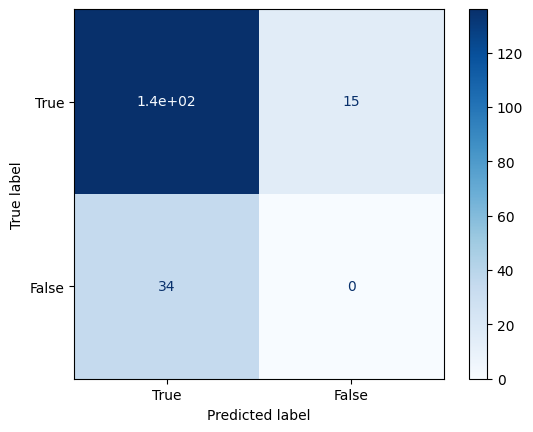

In [22]:
plt.figure(figsize = (10,7))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['True', 'False'])
cm_display.plot(cmap=plt.cm.Blues)

In [23]:
new_model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
results = model("/content/drive/MyDrive/License_Plate/images/test/20231110_143014_jpg.rf.57e7864e90932335193f040743d906d2.jpg"
,save=True)  # predict on an image


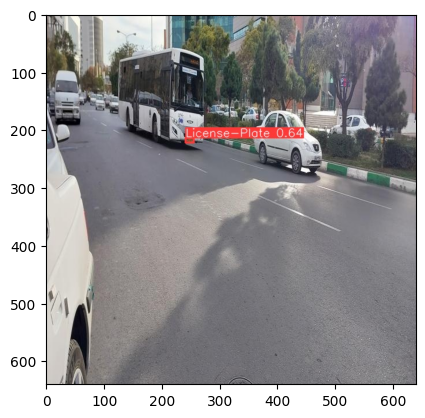

In [38]:
img1 = cv2.imread('/content/runs/detect/train3/20231110_143014_jpg.rf.57e7864e90932335193f040743d906d2.jpg')
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)
plt.imshow(img1)

In [ ]:
results = model("/content/drive/MyDrive/License_Plate/images/test/photo_2023-11-07_14-50-06_jpg.rf.181565f85c0e6739cc182506ebf7b854.jpg",save=True)  # predict on an image

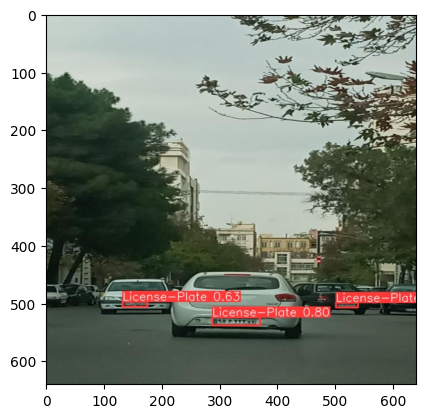

In [37]:
img1 = cv2.imread('/content/runs/detect/train4/photo_2023-11-07_14-50-06_jpg.rf.181565f85c0e6739cc182506ebf7b854.jpg')
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)
plt.imshow(img1)

In [ ]:
results = model("/content/drive/MyDrive/License_Plate/images/test/photo_2023-11-08_18-15-49_jpg.rf.f76788cb9fb01fbc1574fb4c49d6fd84.jpg",save=True)  # predict on an image

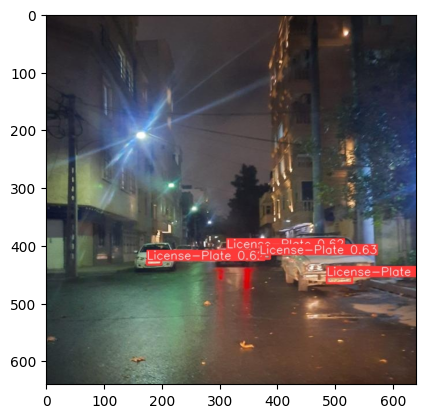

In [36]:
img1 = cv2.imread('/content/runs/detect/train5/photo_2023-11-08_18-15-49_jpg.rf.f76788cb9fb01fbc1574fb4c49d6fd84.jpg')
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)
plt.imshow(img1)

In [33]:
results = model("/content/drive/MyDrive/License_Plate/images/test/20231110_144230_jpg.rf.55c9ccf972803bc1cc5f5480d26970bb.jpg",save=True)  # predict on an image


image 1/1 /content/drive/MyDrive/License_Plate/images/test/20231110_144230_jpg.rf.55c9ccf972803bc1cc5f5480d26970bb.jpg: 640x640 3 License-Plates, 35.8ms
Speed: 2.4ms preprocess, 35.8ms inference, 16.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train6


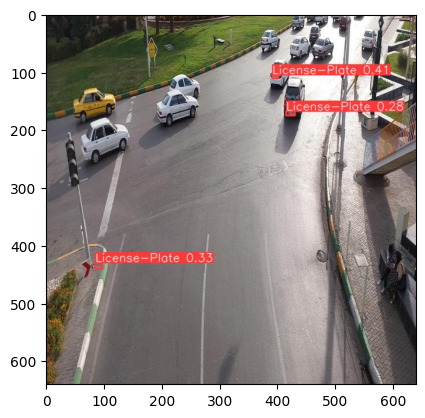

In [35]:
img1 = cv2.imread('/content/runs/detect/train6/20231110_144230_jpg.rf.55c9ccf972803bc1cc5f5480d26970bb.jpg')
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)
plt.imshow(img1)